In [224]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# date_time format
date_time_format = '%Y-%m-%dT%H:%M:%S.%f'
date_only_date_time_format = '%Y-%m-%d'

# read sleep data
sleep_data = pd.read_csv(os.path.join('output/sleep_routine_work', 'workday_sleep_routine.csv'))

# print(sleep_data)

# unique user id
user_id_array = pd.unique(sleep_data['user_id'])
# print(user_id_array)

sleep_stats_array = []
sleep_data_array = []

# sleep data array

for user_id in user_id_array:
    
    individual_sleep_data = sleep_data.loc[sleep_data['user_id'] == user_id]
    work_shift_type = pd.unique(individual_sleep_data['work_shift_type'])
    
    # 1. sleep duration before and after work
    wake_work_duration = np.array(individual_sleep_data.loc[individual_sleep_data['wake_before_work_standard_work_time'] < 8]['wake_before_work_standard_work_time'])
    work_sleep_duration = np.array(individual_sleep_data.loc[individual_sleep_data['sleep_after_work_standard_work_time'] < 8]['sleep_after_work_standard_work_time'])
    
    
    
    # 2. before and after work sleep stats
    before_work_sleep_start = individual_sleep_data.loc[individual_sleep_data['wake_before_work_standard_work_time'] < 8]['sleep_before_work_SleepBeginTimestamp'].to_frame()
    before_work_sleep_end = individual_sleep_data.loc[individual_sleep_data['wake_before_work_standard_work_time'] < 8]['sleep_before_work_SleepEndTimestamp'].to_frame()
    
    after_work_sleep_start = individual_sleep_data.loc[individual_sleep_data['sleep_after_work_standard_work_time'] < 10]['sleep_after_work_SleepBeginTimestamp'].to_frame()
    after_work_sleep_end = individual_sleep_data.loc[individual_sleep_data['sleep_after_work_standard_work_time'] < 10]['sleep_after_work_SleepEndTimestamp'].to_frame()
    
    # efficiency
    before_work_sleep_efficiency = individual_sleep_data.loc[individual_sleep_data['wake_before_work_standard_work_time'] < 10]['sleep_before_work_Efficiency'].to_frame().dropna()
    after_work_sleep_efficiency = individual_sleep_data.loc[individual_sleep_data['sleep_after_work_standard_work_time'] < 10]['sleep_after_work_Efficiency'].to_frame().dropna()
    
    before_work_sleep_efficiency = before_work_sleep_efficiency.loc[before_work_sleep_efficiency['sleep_before_work_Efficiency'] > 0]
    after_work_sleep_efficiency = after_work_sleep_efficiency.loc[after_work_sleep_efficiency['sleep_after_work_Efficiency'] > 0]
    
    before_work_sleep_efficiency_mean = np.mean(before_work_sleep_efficiency) if len(before_work_sleep_efficiency) > 0 else np.nan
    after_work_sleep_efficiency_mean = np.mean(after_work_sleep_efficiency) if len(after_work_sleep_efficiency) > 0 else np.nan
    
    # deep sleep time
    before_work_sleep_deep = individual_sleep_data.loc[individual_sleep_data['wake_before_work_standard_work_time'] < 10]['sleep_before_work_MinutesStageDeep'].to_frame().dropna()
    after_work_sleep_deep = individual_sleep_data.loc[individual_sleep_data['sleep_after_work_standard_work_time'] < 10]['sleep_after_work_MinutesStageDeep'].to_frame().dropna()
    
    before_work_sleep_deep = before_work_sleep_deep.loc[before_work_sleep_deep['sleep_before_work_MinutesStageDeep'] > 0]
    after_work_sleep_deep = after_work_sleep_deep.loc[after_work_sleep_deep['sleep_after_work_MinutesStageDeep'] > 0]
    
    before_work_sleep_deep_mean = np.mean(before_work_sleep_deep) if len(before_work_sleep_deep) > 0 else np.nan
    after_work_sleep_deep_mean = np.mean(after_work_sleep_deep) if len(after_work_sleep_deep) > 0 else np.nan
    
    # light sleep time
    before_work_sleep_light = individual_sleep_data.loc[individual_sleep_data['wake_before_work_standard_work_time'] < 10]['sleep_before_work_MinutesStageLight'].to_frame().dropna()
    after_work_sleep_light = individual_sleep_data.loc[individual_sleep_data['sleep_after_work_standard_work_time'] < 10]['sleep_after_work_MinutesStageLight'].to_frame().dropna()
    
    before_work_sleep_light = before_work_sleep_light.loc[before_work_sleep_light['sleep_before_work_MinutesStageLight'] > 0]
    after_work_sleep_light = after_work_sleep_light.loc[after_work_sleep_light['sleep_after_work_MinutesStageLight'] > 0]
    
    before_work_sleep_light_mean = np.mean(before_work_sleep_light) if len(before_work_sleep_light) > 0 else np.nan
    after_work_sleep_light_mean = np.mean(after_work_sleep_light) if len(after_work_sleep_light) > 0 else np.nan
    
    # rem sleep time
    before_work_sleep_rem = individual_sleep_data.loc[individual_sleep_data['wake_before_work_standard_work_time'] < 10]['sleep_before_work_MinutesStageRem'].to_frame().dropna()
    after_work_sleep_rem = individual_sleep_data.loc[individual_sleep_data['sleep_after_work_standard_work_time'] < 10]['sleep_after_work_MinutesStageRem'].to_frame().dropna()
    
    before_work_sleep_rem = before_work_sleep_rem.loc[before_work_sleep_rem['sleep_before_work_MinutesStageRem'] > 0]
    after_work_sleep_rem = after_work_sleep_rem.loc[after_work_sleep_rem['sleep_after_work_MinutesStageRem'] > 0]
    
    before_work_sleep_rem_mean = np.mean(before_work_sleep_rem) if len(before_work_sleep_rem) > 0 else np.nan
    after_work_sleep_rem_mean = np.mean(after_work_sleep_rem) if len(after_work_sleep_rem) > 0 else np.nan
    
    
    # 2.1 before work sleep start and end time
    before_work_sleep_start_time_array, before_work_sleep_start_date = [], []
    before_work_sleep_end_time_array, before_work_sleep_end_date = [], []
    for index, row in before_work_sleep_start.iterrows():
        # read as datetime
        if len(row.values[0]) > 0: 
            start_sleep = datetime.datetime.strptime(row.values[0], date_time_format)
            
            # if day shift nurse, we need to consider sleep after 12 am
            if work_shift_type == 1:
                # if it sleep after 12 am clock
                if start_sleep.hour < 5:
                    start_sleep_time = start_sleep.hour + 24 + start_sleep.minute / 60
                else:
                    start_sleep_time = start_sleep.hour + start_sleep.minute / 60
            else:
                start_sleep_time = start_sleep.hour + start_sleep.minute / 60
            
            before_work_sleep_start_time_array.append(start_sleep_time)
        before_work_sleep_start_date.append(start_sleep)
            
    for index, row in before_work_sleep_end.iterrows():
        # read as datetime
        if len(row.values[0]) > 0: 
            end_sleep = datetime.datetime.strptime(row.values[0], date_time_format)
            end_sleep_time = end_sleep.hour + end_sleep.minute / 60
            before_work_sleep_end_time_array.append(end_sleep_time)
        before_work_sleep_end_date.append(end_sleep)
        
    before_work_sleep_start_time_mean = np.mean(before_work_sleep_start_time_array) if np.mean(before_work_sleep_start_time_array) < 24 else np.mean(before_work_sleep_start_time_array) - 24
    before_work_sleep_end_time_mean = np.mean(before_work_sleep_end_time_array) if np.mean(before_work_sleep_end_time_array) < 24 else np.mean(before_work_sleep_end_time_array) - 24
    
    
    # 2.2 after work sleep start and end time
    after_work_sleep_start_time_array, after_work_sleep_start_date = [], []
    after_work_sleep_end_time_array, after_work_sleep_end_date = [], []
    for index, row in after_work_sleep_start.iterrows():
        # read as datetime
        if len(row.values[0]) > 0: 
            start_sleep = datetime.datetime.strptime(row.values[0], date_time_format)
            
            # if day shift nurse, we need to consider sleep after 12 am
            if work_shift_type == 1:
                # if it sleep after 12 am clock
                if start_sleep.hour < 5:
                    start_sleep_time = start_sleep.hour + 24 + start_sleep.minute / 60
                else:
                    start_sleep_time = start_sleep.hour + start_sleep.minute / 60
            else:
                start_sleep_time = start_sleep.hour + start_sleep.minute / 60
            
            after_work_sleep_start_time_array.append(start_sleep_time)
        after_work_sleep_start_date.append(start_sleep)
            
    for index, row in after_work_sleep_end.iterrows():
        # read as datetime
        if len(row.values[0]) > 0: 
            end_sleep = datetime.datetime.strptime(row.values[0], date_time_format)
            end_sleep_time = end_sleep.hour + end_sleep.minute / 60
            after_work_sleep_end_time_array.append(end_sleep_time)
        after_work_sleep_end_date.append(end_sleep)
        
    after_work_sleep_start_time_mean = np.mean(after_work_sleep_start_time_array) if np.mean(after_work_sleep_start_time_array) < 24 else np.mean(after_work_sleep_start_time_array) - 24
    after_work_sleep_end_time_mean = np.mean(after_work_sleep_end_time_array) if np.mean(after_work_sleep_end_time_array) < 24 else np.mean(after_work_sleep_end_time_array) - 24
    
    # 2.3 before work sleep duration
    before_work_sleep_duration = []
    for index in range(len(before_work_sleep_start_date)):
        duration = (before_work_sleep_end_date[index] - before_work_sleep_start_date[index]).total_seconds() / 3600
        before_work_sleep_duration.append(duration)
    # print(before_work_sleep_duration)
    
    
    
    # 2.4 after work sleep duration
    after_work_sleep_duration = []
    for index in range(len(after_work_sleep_start_date)):
        duration = (after_work_sleep_end_date[index] - after_work_sleep_start_date[index]).total_seconds() / 3600
        after_work_sleep_duration.append(duration)
    
    # print(wake_work_duration)
    # print(work_sleep_duration)
    
    # Sleep stats
    if len(wake_work_duration) > 0 and len(work_sleep_duration) > 0:
        sleep_stats = pd.DataFrame([user_id, pd.unique(individual_sleep_data['work_shift_type'])[0],
                                    before_work_sleep_start_time_mean,
                                    before_work_sleep_end_time_mean,
                                    np.mean(before_work_sleep_duration),
                                    np.mean(before_work_sleep_efficiency),
                                    before_work_sleep_deep_mean,
                                    before_work_sleep_light_mean,
                                    before_work_sleep_rem_mean,
                                    after_work_sleep_start_time_mean,
                                    after_work_sleep_end_time_mean,
                                    np.mean(after_work_sleep_duration),
                                    np.mean(after_work_sleep_efficiency),
                                    after_work_sleep_deep_mean,
                                    after_work_sleep_light_mean,
                                    after_work_sleep_rem_mean,
                                    np.min(wake_work_duration), np.max(wake_work_duration), 
                                    np.mean(wake_work_duration), np.std(wake_work_duration),
                                    np.min(work_sleep_duration), np.max(work_sleep_duration), 
                                    np.mean(work_sleep_duration), np.std(work_sleep_duration)]).transpose()

        sleep_stats.columns = ['user_id', 'work_shift_type',
                               'before_work_sleep_start_time_mean',
                               'before_work_sleep_end_time_mean',
                               'before_work_sleep_duration_mean',
                               'before_work_sleep_efficienct_mean',
                               'before_work_sleep_deep_mean',
                               'before_work_sleep_light_mean',
                               'before_work_sleep_rem_mean',
                               'after_work_sleep_start_time_mean',
                               'after_work_sleep_end_time_mean',
                               'after_work_sleep_duration_mean',
                               'after_work_sleep_efficienct_mean',
                               'after_work_sleep_deep_mean',
                               'after_work_sleep_light_mean',
                               'after_work_sleep_rem_mean',
                               'wake_work_min', 'wake_work_max', 'wake_work_mean', 'wake_work_std',
                               'work_sleep_min', 'work_sleep_max', 'work_sleep_mean', 'work_sleep_std']
        
        if len(sleep_stats_array) == 0:
            sleep_stats_array = sleep_stats
        else:
            sleep_stats_array = sleep_stats_array.append(sleep_stats)
    
    # print(sleep_stats)
    
    # Construct frame data
    frame = {}
    frame['user_id'] = user_id
    frame['work_shift_type'] = pd.unique(sleep_duration['work_shift_type'])
    frame['stats'] = sleep_stats
    frame['data'] = sleep_duration
    
    sleep_data_array.append(frame)
    
# print(sleep_stats_array)

/Users/tiantianfeng/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tiantianfeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Extract day shift and night shift data

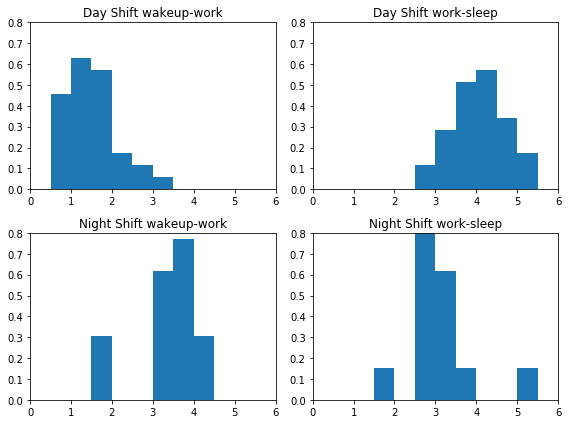

In [255]:
day_shift_data = sleep_stats_array.loc[sleep_stats_array['work_shift_type'] == 1]
night_shift_data = sleep_stats_array.loc[sleep_stats_array['work_shift_type'] == 0]

num_of_bins = np.arange(0.0, 6.0, 0.5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(list(np.array(day_shift_data['wake_work_mean'])), normed=True, bins=num_of_bins)
ax0.set_title('Day Shift wakeup-work')
ax0.set_xlim([0, 6])
ax0.set_ylim([0, 0.8])

ax1.hist(list(np.array(day_shift_data['work_sleep_mean'])), normed=True, bins=num_of_bins)
ax1.set_title('Day Shift work-sleep')
ax1.set_xlim([0, 6])
ax1.set_ylim([0, 0.8])

ax2.hist(list(np.array(night_shift_data['wake_work_mean'])), normed=True, bins=num_of_bins)
ax2.set_title('Night Shift wakeup-work')
ax2.set_xlim([0, 6])
ax2.set_ylim([0, 0.8])

ax3.hist(list(np.array(night_shift_data['work_sleep_mean'])), normed=True, bins=num_of_bins)
ax3.set_title('Night Shift work-sleep')
ax3.set_xlim([0, 6])
ax3.set_ylim([0, 0.8])

fig.tight_layout()
plt.show()



## Before and after work sleep start and end time in the day

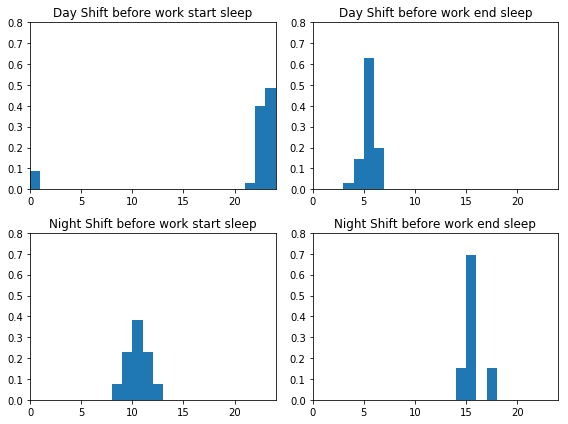

In [226]:
num_of_bins = range(0, 25, 1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(list(np.array(day_shift_data['before_work_sleep_start_time_mean'])), normed=True, bins=num_of_bins)
ax0.set_title('Day Shift before work start sleep')
ax0.set_xlim([0, 24])
ax0.set_ylim([0, 0.8])

ax1.hist(list(np.array(day_shift_data['before_work_sleep_end_time_mean'])), normed=True, bins=num_of_bins)
ax1.set_title('Day Shift before work end sleep')
ax1.set_xlim([0, 24])
ax1.set_ylim([0, 0.8])

ax2.hist(list(np.array(night_shift_data['before_work_sleep_start_time_mean'])), normed=True, bins=num_of_bins)
ax2.set_title('Night Shift before work start sleep')
ax2.set_xlim([0, 24])
ax2.set_ylim([0, 0.8])

ax3.hist(list(np.array(night_shift_data['before_work_sleep_end_time_mean'])), normed=True, bins=num_of_bins)
ax3.set_title('Night Shift before work end sleep')
ax3.set_xlim([0, 24])
ax3.set_ylim([0, 0.8])

fig.tight_layout()
plt.show()

## Before and after work sleep duration

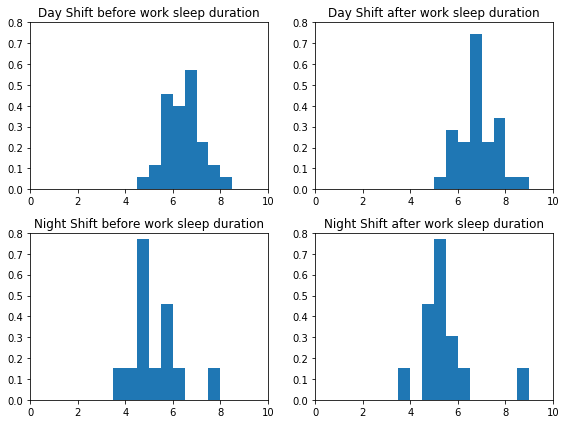

In [256]:
# num_of_bins = range(0, 11, 1)
num_of_bins = np.arange(0.0, 10.0, 0.5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(list(np.array(day_shift_data['before_work_sleep_duration_mean'])), normed=True, bins=num_of_bins)
ax0.set_title('Day Shift before work sleep duration')
ax0.set_xlim([0, 10])
ax0.set_ylim([0, 0.8])

ax1.hist(list(np.array(day_shift_data['after_work_sleep_duration_mean'])), normed=True, bins=num_of_bins)
ax1.set_title('Day Shift after work sleep duration')
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 0.8])

ax2.hist(list(np.array(night_shift_data['before_work_sleep_duration_mean'])), normed=True, bins=num_of_bins)
ax2.set_title('Night Shift before work sleep duration')
ax2.set_xlim([0, 10])
ax2.set_ylim([0, 0.8])

ax3.hist(list(np.array(night_shift_data['after_work_sleep_duration_mean'])), normed=True, bins=num_of_bins)
ax3.set_title('Night Shift after work sleep duration')
ax3.set_xlim([0, 10])
ax3.set_ylim([0, 0.8])

fig.tight_layout()
plt.show()

## Before and after work sleep efficiency

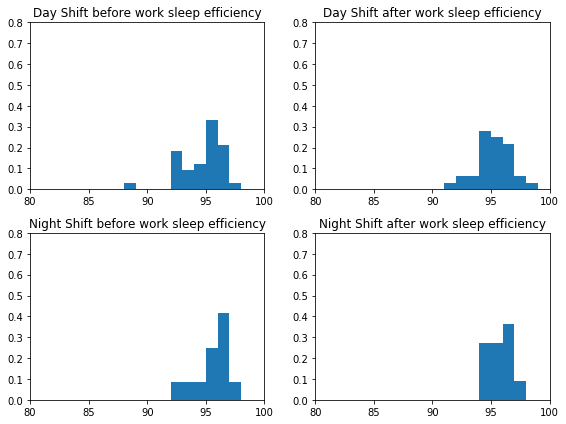

In [260]:
num_of_bins = np.arange(80.0, 100.0, 1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()

temp = []
for data in list(day_shift_data['before_work_sleep_efficienct_mean']):
    if data.values[0] > 0:
        temp.append(data.values[0])
      
ax0.hist(temp, normed=True, bins=num_of_bins)
ax0.set_title('Day Shift before work sleep efficiency')
ax0.set_xlim([80, 100])
ax0.set_ylim([0, 0.8])

temp = []
for data in list(day_shift_data['after_work_sleep_efficienct_mean']):
    if data.values[0] > 0:
        temp.append(data.values[0])
        
ax1.hist(temp, normed=True, bins=num_of_bins)
ax1.set_title('Day Shift after work sleep efficiency')
ax1.set_xlim([80, 100])
ax1.set_ylim([0, 0.8])

temp = []
for data in list(night_shift_data['before_work_sleep_efficienct_mean']):
    if data.values[0] > 0:
        temp.append(data.values[0])

ax2.hist(temp, normed=True, bins=num_of_bins)
ax2.set_title('Night Shift before work sleep efficiency')
ax2.set_xlim([80, 100])
ax2.set_ylim([0, 0.8])

temp = []
for data in list(night_shift_data['after_work_sleep_efficienct_mean']):
    if data.values[0] > 0:
        temp.append(data.values[0])

ax3.hist(temp, normed=True, bins=num_of_bins)
ax3.set_title('Night Shift after work sleep efficiency')
ax3.set_xlim([80, 100])
ax3.set_ylim([0, 0.8])

fig.tight_layout()
plt.show()

## Before and after work sleep deep

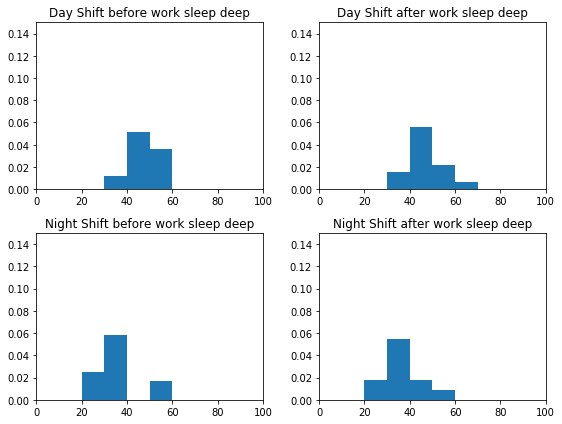

In [262]:
num_of_bins = range(0, 100, 10)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()

temp = []
for data in list(day_shift_data['before_work_sleep_deep_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0])
      
ax0.hist(temp, normed=True, bins=num_of_bins)
ax0.set_title('Day Shift before work sleep deep')
ax0.set_xlim([0, 100])
ax0.set_ylim([0, 0.15])

temp = []
for data in list(day_shift_data['after_work_sleep_deep_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0])
        
ax1.hist(temp, normed=True, bins=num_of_bins)
ax1.set_title('Day Shift after work sleep deep')
ax1.set_xlim([0, 100])
ax1.set_ylim([0, 0.15])

temp = []
for data in list(night_shift_data['before_work_sleep_deep_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0])

ax2.hist(temp, normed=True, bins=num_of_bins)
ax2.set_title('Night Shift before work sleep deep')
ax2.set_xlim([0, 100])
ax2.set_ylim([0, 0.15])

temp = []
for data in list(night_shift_data['after_work_sleep_deep_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0])

ax3.hist(temp, normed=True, bins=num_of_bins)
ax3.set_title('Night Shift after work sleep deep')
ax3.set_xlim([0, 100])
ax3.set_ylim([0, 0.15])

fig.tight_layout()
plt.show()

## Before and after work sleep light

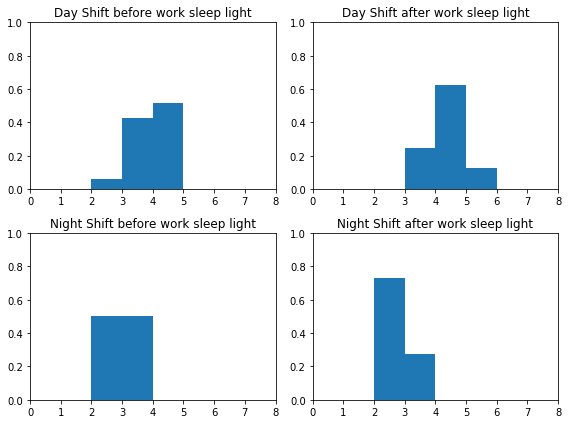

In [242]:
num_of_bins = range(0, 8, 1)
# num_of_bins = 5

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()

temp = []
for data in list(day_shift_data['before_work_sleep_light_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)
      
ax0.hist(temp, normed=True, bins=num_of_bins)
ax0.set_title('Day Shift before work sleep light')
ax0.set_xlim([0, 8])
ax0.set_ylim([0, 1])

temp = []
for data in list(day_shift_data['after_work_sleep_light_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)
        
ax1.hist(temp, normed=True, bins=num_of_bins)
ax1.set_title('Day Shift after work sleep light')
ax1.set_xlim([0, 8])
ax1.set_ylim([0, 1])

temp = []
for data in list(night_shift_data['before_work_sleep_light_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)

ax2.hist(temp, normed=True, bins=num_of_bins)
ax2.set_title('Night Shift before work sleep light')
ax2.set_xlim([0, 8])
ax2.set_ylim([0, 1])

temp = []
for data in list(night_shift_data['after_work_sleep_light_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)

ax3.hist(temp, normed=True, bins=num_of_bins)
ax3.set_title('Night Shift after work sleep light')
ax3.set_xlim([0, 8])
ax3.set_ylim([0, 1])

fig.tight_layout()
plt.show()

## Before and after work sleep rem

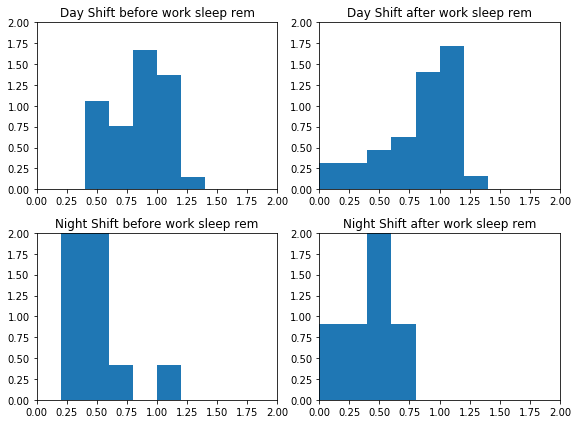

In [263]:
num_of_bins = np.arange(0.0, 2.0, 0.2)
# num_of_bins = 5

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()

temp = []
for data in list(day_shift_data['before_work_sleep_rem_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)
      
ax0.hist(temp, normed=True, bins=num_of_bins)
ax0.set_title('Day Shift before work sleep rem')
ax0.set_xlim([0, 2])
ax0.set_ylim([0, 2])

temp = []
for data in list(day_shift_data['after_work_sleep_rem_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)
        
ax1.hist(temp, normed=True, bins=num_of_bins)
ax1.set_title('Day Shift after work sleep rem')
ax1.set_xlim([0, 2])
ax1.set_ylim([0, 2])

temp = []
for data in list(night_shift_data['before_work_sleep_rem_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)

ax2.hist(temp, normed=True, bins=num_of_bins)
ax2.set_title('Night Shift before work sleep rem')
ax2.set_xlim([0, 2])
ax2.set_ylim([0, 2])

temp = []
for data in list(night_shift_data['after_work_sleep_rem_mean'].dropna()):
    if data.values[0] > 0:
        temp.append(data.values[0] / 60)

ax3.hist(temp, normed=True, bins=num_of_bins)
ax3.set_title('Night Shift after work sleep rem')
ax3.set_xlim([0, 2])
ax3.set_ylim([0, 2])

fig.tight_layout()
plt.show()